# **1. Perkenalan Dataset**


1. **Sumber Dataset**:  
   https://www.kaggle.com/code/janiobachmann/german-credit-analysis-a-risk-perspective/notebook


- Age (numeric)
- Sex (text: male, female)
- Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - - skilled, 3 - highly skilled)
- Housing (text: own, rent, or free)
- Saving accounts (text - little, moderate, quite rich, rich)
- Checking account (numeric, in DM - Deutsch Mark)
- Credit amount (numeric, in DM)
- Duration (numeric, in month)
- Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)


# **2. Import Library**


Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Pastikan path ini benar sesuai struktur lokal Anda
data_path = '/content/sample_data/german_credit_data.csv'
df = pd.read_csv(data_path)

# Tampilkan 5 baris pertama untuk verifikasi
print(df.head())

   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  Risk  
0           1169         6             radio/TV  good  
1           5951        48             radio/TV   bad  
2           2096        12            education  good  
3           7882        42  furniture/equipment  good  
4           4870        24                  car   bad  


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [4]:
# Tampilkan statistik deskriptif
print(df.describe())

        Unnamed: 0          Age          Job  Credit amount     Duration
count  1000.000000  1000.000000  1000.000000    1000.000000  1000.000000
mean    499.500000    35.546000     1.904000    3271.258000    20.903000
std     288.819436    11.375469     0.653614    2822.736876    12.058814
min       0.000000    19.000000     0.000000     250.000000     4.000000
25%     249.750000    27.000000     2.000000    1365.500000    12.000000
50%     499.500000    33.000000     2.000000    2319.500000    18.000000
75%     749.250000    42.000000     2.000000    3972.250000    24.000000
max     999.000000    75.000000     3.000000   18424.000000    72.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
# Cek Missing Values di DataFrame
print("Jumlah Nilai Kosong per Kolom:")
print(df.isnull().sum())


Jumlah Nilai Kosong per Kolom:
Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64



-- Distribusi Kelas Target ('Risk') ---
Risk
good    0.7
bad     0.3
Name: proportion, dtype: float64


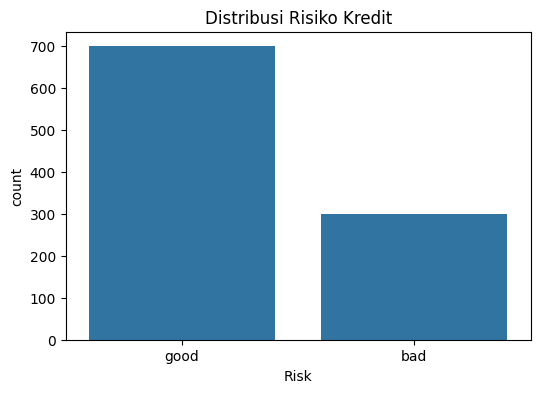

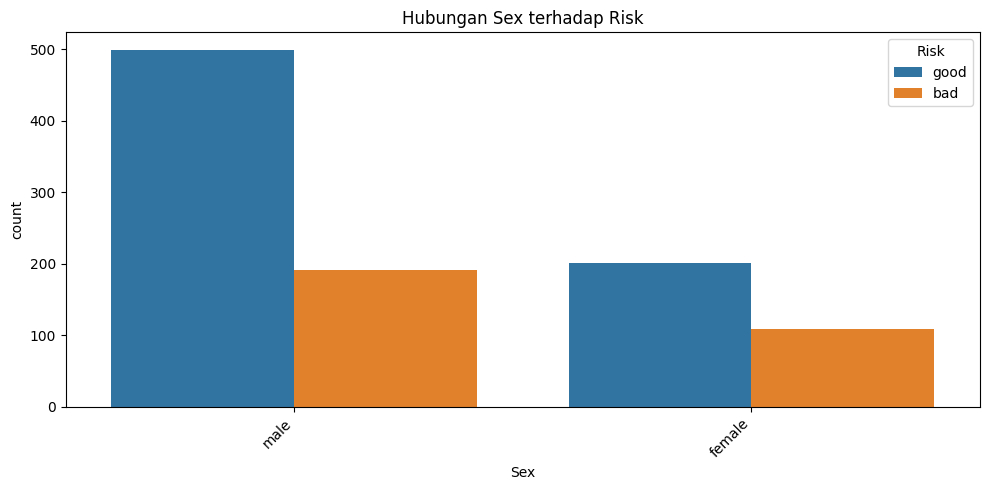

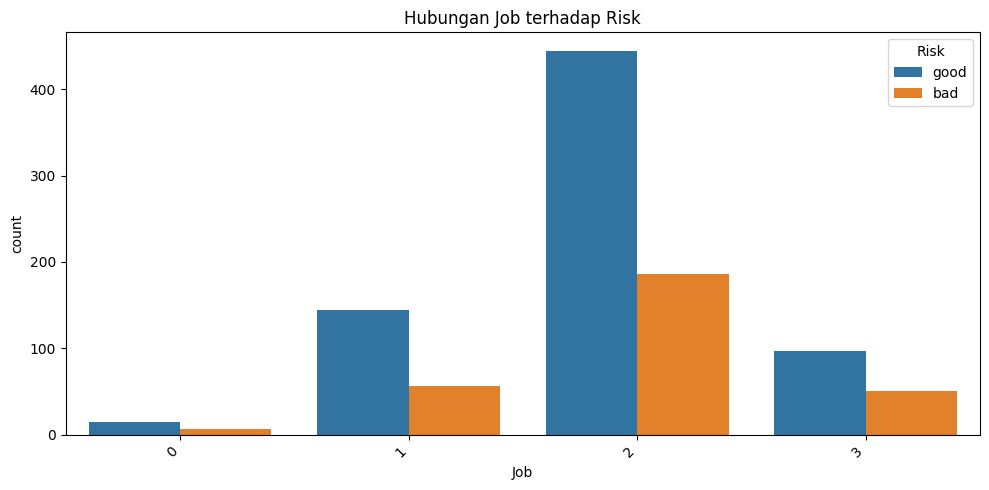

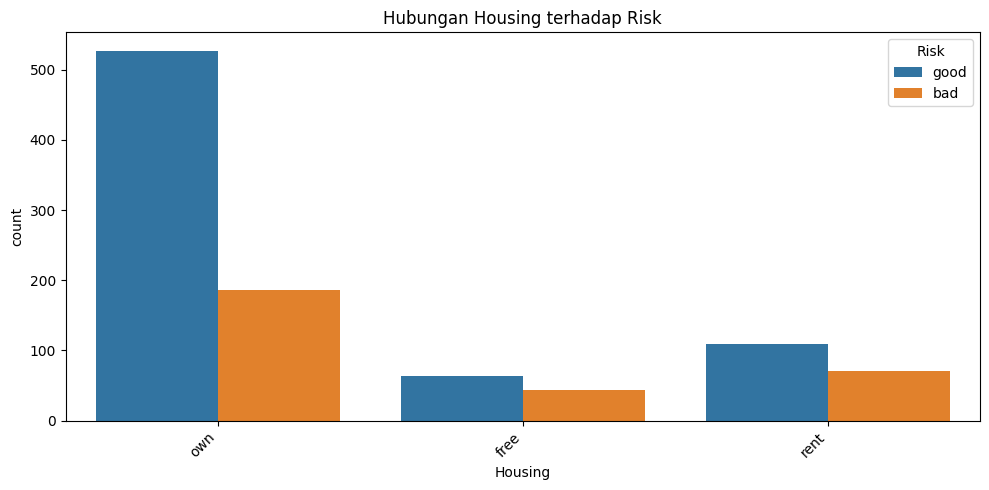

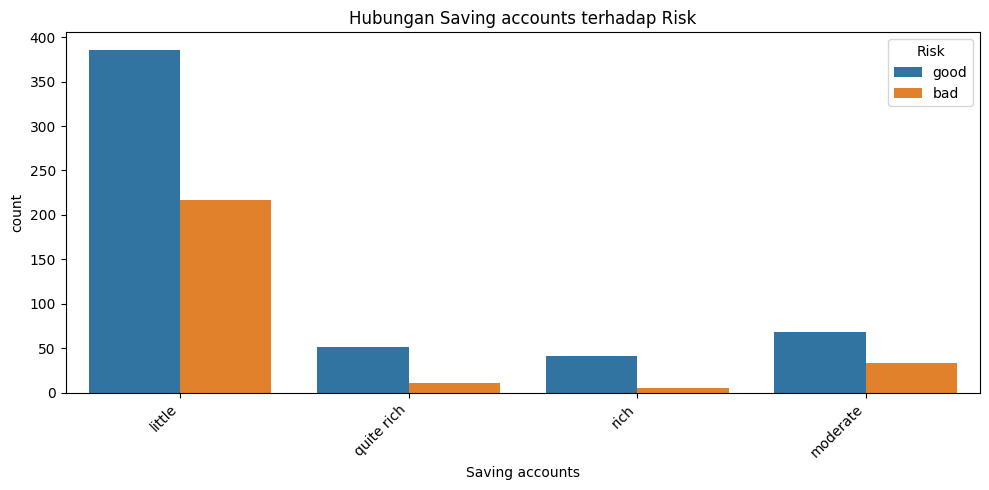

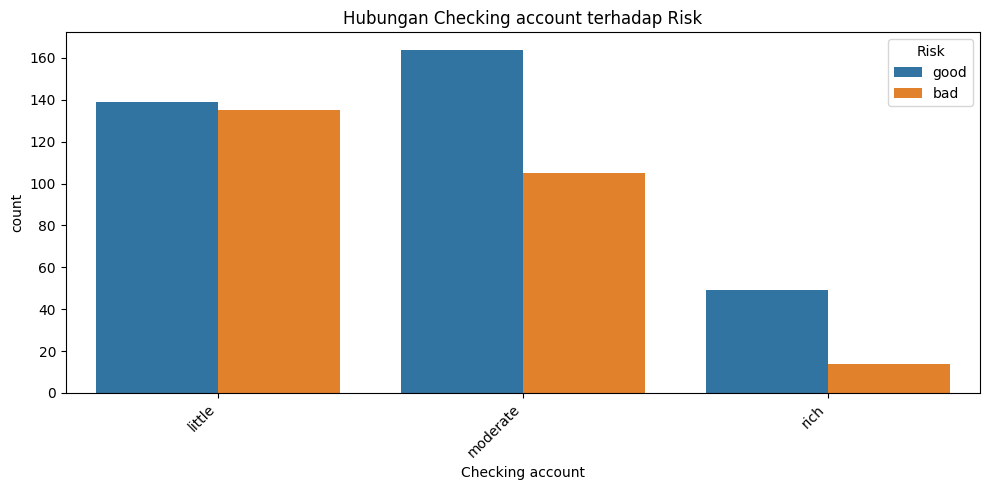

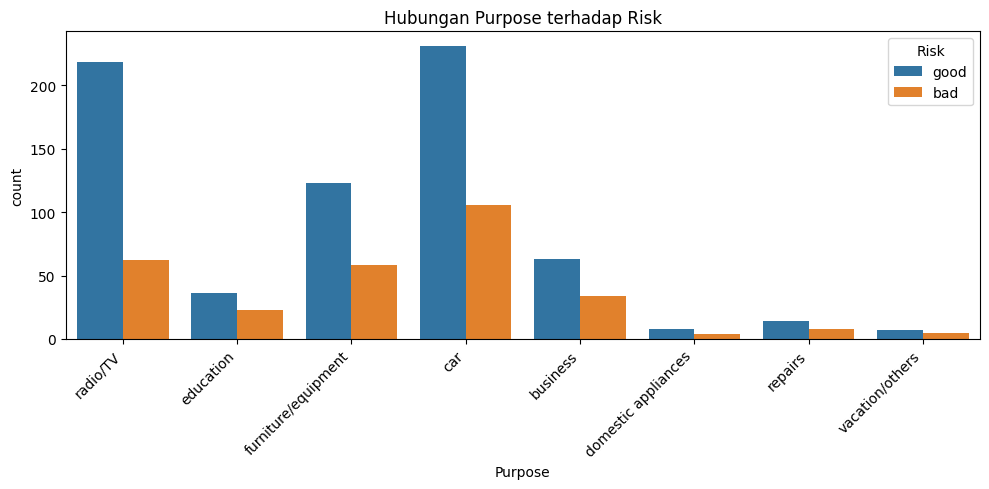

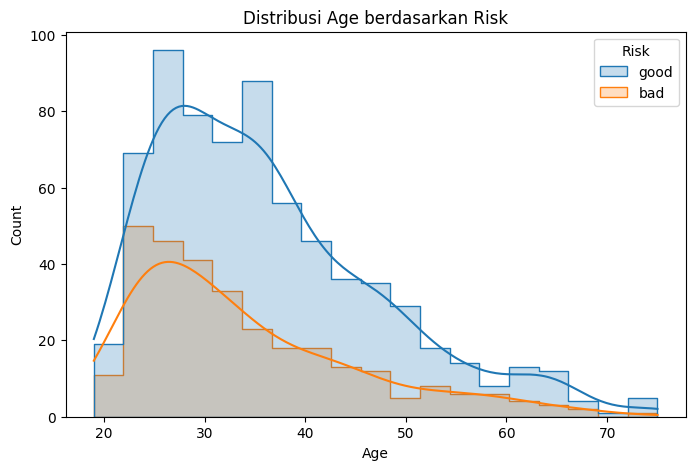

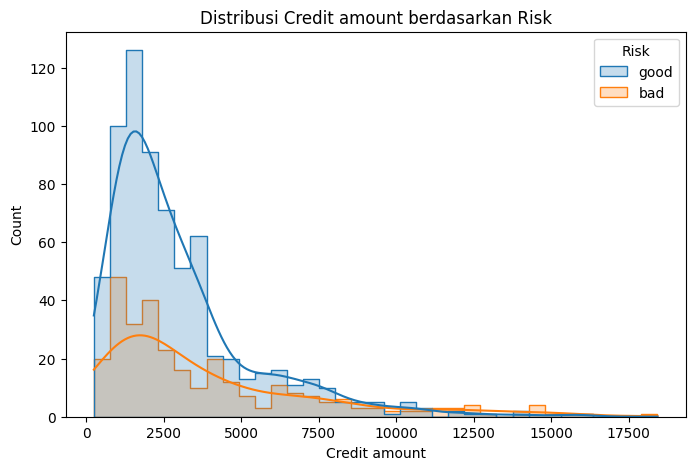

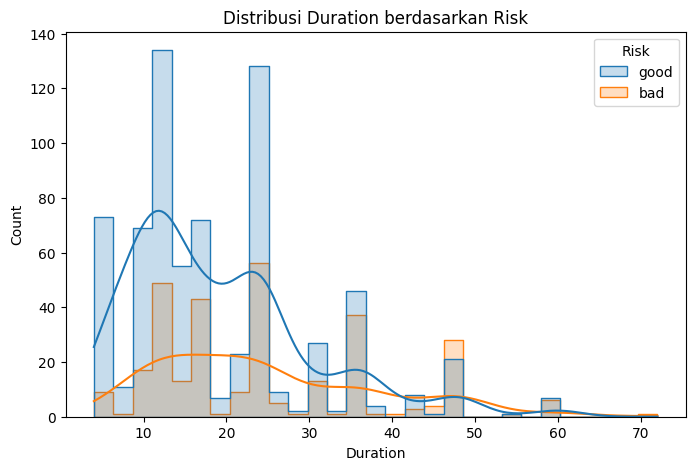

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("\n-- Distribusi Kelas Target ('Risk') ---")
print(df['Risk'].value_counts(normalize=True))

plt.figure(figsize=(6, 4))
sns.countplot(x='Risk', data=df)
plt.title('Distribusi Risiko Kredit')
plt.show()

# Tentukan fitur kategorikal
categorical_features = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

for col in categorical_features:
    plt.figure(figsize=(10, 5))
    # Analisis hubungan fitur kategorikal dengan target 'Risk'
    sns.countplot(x=col, hue='Risk', data=df)
    plt.title(f'Hubungan {col} terhadap Risk')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# --- Analisis Fitur Numerik terhadap Target ---
numerical_features = ['Age', 'Credit amount', 'Duration']

for col in numerical_features:
    plt.figure(figsize=(8, 5))
    # Analisis distribusi berdasarkan Risk
    sns.histplot(df, x=col, hue='Risk', element="step", kde=True)
    plt.title(f'Distribusi {col} berdasarkan Risk')
    plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import joblib
import os

# --- 1. Pembersihan Data Awal ---
# Hapus kolom indeks yang tidak relevan
df = df.drop('Unnamed: 0', axis=1)

# Tangani Missing Values: Imputasi dengan kategori 'Unknown'
missing_cols = ['Saving accounts', 'Checking account']
for col in missing_cols:
    df[col].fillna('Unknown', inplace=True)

print("Pembersihan dan Imputasi Missing Values Selesai.")

Pembersihan dan Imputasi Missing Values Selesai.


/tmp/ipython-input-2824913129.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown', inplace=True)


In [8]:
# --- 2. Pemisahan Fitur (X) dan Target (y) ---
X = df.drop('Risk', axis=1)
y = df['Risk']

In [9]:
# --- 3. Definisikan Tipe Kolom dan Pipeline ---
numerical_features = ['Age', 'Credit amount', 'Duration']
# Job diperlakukan sebagai kategori (meskipun int64) karena nilainya adalah kode
categorical_features = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

# Pipeline untuk fitur numerik: Standardisasi
numeric_transformer = StandardScaler()

# Pipeline untuk fitur kategorikal: One-Hot Encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Gabungkan Transformer dengan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)



In [10]:
# --- 4. Train-Test Split ---
# Pisahkan data sebelum menerapkan preprocessing agar tidak terjadi kebocoran data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nData Split: Train={X_train.shape[0]}, Test={X_test.shape[0]}")


Data Split: Train=800, Test=200


In [11]:
# --- 5. Mendefinisikan Pipeline) ---
y_train_num = y_train.map({'good': 0, 'bad': 1})
y_test_num = y_test.map({'good': 0, 'bad': 1})

# Buat model/classifier
rfc = RandomForestClassifier(random_state=42) # tambahkan hyperparameter terbaik kamu di sini

# Gabungkan Preprocessor dan Classifier ke dalam Pipeline
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rfc)
])

print("Pipeline Penuh (Preprocessor + Classifier) Dibuat.")

Pipeline Penuh (Preprocessor + Classifier) Dibuat.


In [12]:
# --- 6. Latih Pipeline Penuh ---
# Melatih pipeline akan melakukan fit_transform pada preprocessor, lalu fit pada classifier
full_pipeline.fit(X_train, y_train_num)
print("Pipeline Penuh berhasil dilatih dengan data mentah (X_train).")

Pipeline Penuh berhasil dilatih dengan data mentah (X_train).


In [14]:
# --- 7. Evaluasi ) ---
y_pred = full_pipeline.predict(X_test)
print("\nEvaluasi Model:")
print(classification_report(y_test_num, y_pred))


Evaluasi Model:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       140
           1       0.59      0.50      0.54        60

    accuracy                           0.74       200
   macro avg       0.69      0.68      0.68       200
weighted avg       0.74      0.74      0.74       200



In [15]:
# --- 8. Menyimpan Pipeline Penuh  ---
output_model_path = '/content/sample_data'
if not os.path.exists(output_model_path):
    os.makedirs(output_model_path)

# SIMPAN OBJEK PIPELINE LENGKAP!
joblib.dump(full_pipeline, os.path.join(output_model_path, 'model.pkl'))
print(f"✅ Pipeline Penuh disimpan sebagai: {os.path.join(output_model_path, 'model.pkl')}")

✅ Pipeline Penuh disimpan sebagai: /content/sample_data/model.pkl


In [16]:
# --- 9. Simpan Hasil Preprocessing ke CSV  ---

import pandas as pd

# Terapkan preprocessing ke seluruh dataset (fit_transform X agar hasilnya bersih)
X_preprocessed = preprocessor.fit_transform(X)

# Ambil kembali nama kolom hasil OneHotEncoder
encoded_cat_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = list(numerical_features) + list(encoded_cat_cols)

# Buat DataFrame hasil preprocessing
df_preprocessed = pd.DataFrame(X_preprocessed, columns=all_feature_names)

# Tambahkan kolom target (Risk)
df_preprocessed['Risk'] = y.map({'good': 0, 'bad': 1}).values

# Tentukan path penyimpanan hasil preprocessing
preprocessed_output_path = '/content/sample_data/dataset_preprocessed.csv'

# Pastikan foldernya ada
os.makedirs(os.path.dirname(preprocessed_output_path), exist_ok=True)

# Simpan dataset hasil preprocessing
df_preprocessed.to_csv(preprocessed_output_path, index=False)
print(f"✅ Dataset hasil preprocessing disimpan di: {preprocessed_output_path}")


✅ Dataset hasil preprocessing disimpan di: /content/sample_data/dataset_preprocessed.csv
